# Laboratorio 4

Si richiede un'implementazione di un sistema di text segmentation, prendendo ispirazione da TextTiling. In particolare, partendo da un corpus composto da almeno 3 sezioni su tematiche molto diverse (ad es. potete usare paragrafi da tre pagine di Wikipedia diverse), dovrete testare il vostro sistema in modo che riesca ad individuare le giuste linee di taglio (o quasi).

In [422]:
import pandas as pd
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


In [423]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clear_sentence(sentence):
    tokens = nltk.word_tokenize(sentence)
    tokens = [token for token in tokens if token not in string.punctuation] #tolgo la punteggiatura
    tokens = [token.lower() for token in tokens] # sostituisco le maiuscole con le minuscole
    tokens = [token for token in tokens if token not in stop_words] # rimuovo le stop words
    tokens = [lemmatizer.lemmatize(token) for token in tokens] # lemmatizzo
    
    return tokens

In [424]:
# calcolo per ogni frase il numero di parole

def calcola_occorrenze_parole_frasi(sentences):
    words_per_sentence = {}

    for i, sentence in enumerate(sentences):
        tokens = clear_sentence(sentence)
        words_per_sentence[i] = {}
        for token in tokens:
            if token not in words_per_sentence[i]:
                words_per_sentence[i][token] = 1
            else:
                words_per_sentence[i][token] += 1
    
    return words_per_sentence

In [425]:
#dividi words_per_sentence in k parti uguali
def divide_in_k_parts(words_per_sentence, k=3):
    parts = {}
    num_sentences = len(words_per_sentence)
    sentence_per_part = num_sentences // k
    j = 0
    num_parte = 0
    parts[num_parte] = {}

    for i, sentence in enumerate(words_per_sentence):
        if j < sentence_per_part or num_parte == k-1:
            parts[num_parte][i] = words_per_sentence[sentence]
            j += 1
        else:
            j = 0
            num_parte += 1
            if num_parte not in parts:
                parts[num_parte] = {}
            parts[num_parte][i] = words_per_sentence[sentence]
            j += 1
    
    return parts

In [426]:
#per ogni parte calcolo l'overlap lessicale nelle frasi a due a due
def get_cohesion_between_two_sentences_old(words_per_sentence):
    print('\n')
    print('COMPUTE COHESION')
    words_count = {}

    i = 0
    for j in words_per_sentence:
        if j+1 in words_per_sentence:
            words_count[j] = 0

            for word in words_per_sentence[j]:
                if word in words_per_sentence[j+1]:
                    words_count[j] +=words_per_sentence[j][word] + words_per_sentence[j][word]

    print(words_count)

    plt.plot(words_count.keys(), words_count.values())
    plt.show()

    return words_count


#per ogni parte calcolo l'overlap lessicale nelle frasi a due a due
def get_cohesion_between_two_sentences(parts):
    print('\n')
    print('COMPUTE COHESION')
    words_count = []
    j = 0

    for index, part in enumerate(parts):
        words_count_per_block = {}
        i = list(parts[index].keys())[0]

        for sentence in parts[index]:
            if i+1 in parts[index]:
                words_count_per_block[j] = 0

                for word in parts[index][i]:
                    if word in parts[index][i+1]:
                        words_count_per_block[j] += parts[index][i][word] + parts[index][i+1][word]

                j += 1
                i += 1
        words_count.append(words_count_per_block)

    print(words_count)

    #plot words_count
    #for index, words_count_per_block in enumerate(words_count):
    #    plt.plot(words_count_per_block.keys(), words_count_per_block.values(), label=f'parte {index+1}')

    #plt.legend()
    #plt.show()

    return words_count

In [427]:
def get_cohesion_in_cluster(words_sentence):
    return sum(words_sentence.values())

In [428]:
def recalculate_break_points(words_count, break_points):
    print('\n')
    print('RECALCULATE BREAK POINTS')

    start_sentences = {k: words_count[k] for k in list(words_count)[:break_points[1]]}
    medium_sentences = {k: words_count[k] for k in list(words_count)[break_points[1]:break_points[2]]}
    end_sentences = {k: words_count[k] for k in list(words_count)[break_points[2]:]}

    start_min_value_positions = [k for k, v in start_sentences.items() if v == min(start_sentences.values())]
    medium_min_value_positions = [k for k, v in medium_sentences.items() if v == min(medium_sentences.values())]
    end_min_value_positions = [k for k, v in end_sentences.items() if v == min(end_sentences.values())]

    #1
    start_pos = start_min_value_positions[len(start_min_value_positions)-1]
    medium_pos = medium_min_value_positions[0]

    if (break_points[1] - start_pos) > (medium_pos - break_points[1]):
        break_points[1] = medium_pos
    else:
        break_points[1] = start_pos

    print('#1',start_pos, medium_pos)

    #2
    medium_pos = medium_min_value_positions[len(medium_min_value_positions)-1]
    end_pos = end_min_value_positions[0]

    if (break_points[2] - medium_pos) > (end_pos - break_points[2]):
        break_points[2] = end_pos
    else:
        break_points[2] = medium_pos

    print('#2',start_pos, medium_pos)
    print(break_points)

    print(start_min_value_positions, medium_min_value_positions, end_min_value_positions)
    print('\n')

    return break_points
    


In [429]:
def sum_word_count(words_count):
    for count in words_count:
        print(sum(count.values()))

### MAIN



COMPUTE COHESION
{0: 4, 1: 2, 2: 8, 3: 2, 4: 0, 5: 0, 6: 0, 7: 2, 8: 4, 9: 0, 10: 12, 11: 2, 12: 0, 13: 0, 14: 4, 15: 2, 16: 0, 17: 2, 18: 4, 19: 4}


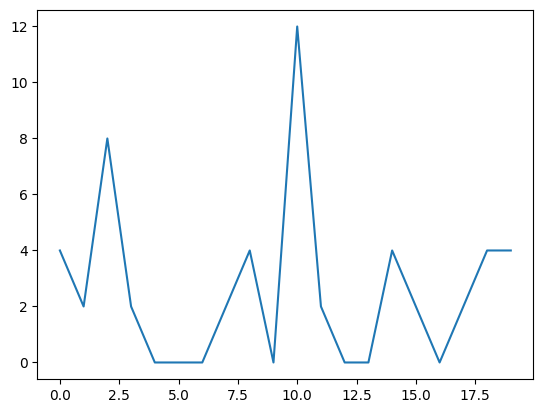

{0: 4, 1: 2, 2: 8, 3: 2, 4: 0, 5: 0, 6: 0} 16
{7: 2, 8: 4, 9: 0, 10: 12, 11: 2, 12: 0, 13: 0} 20
{14: 4, 15: 2, 16: 0, 17: 2, 18: 4, 19: 4} 16


RECALCULATE BREAK POINTS
#1 6 9
#2 6 13
[0, 6, 13]
[4, 5, 6] [9, 12, 13] [16]




RECALCULATE BREAK POINTS
#1 5 6
#2 5 12
[0, 6, 13]
[4, 5] [6, 9, 12] [13, 16]




In [430]:
sentences = pd.read_csv('corpus.csv')['sentence']
words_per_sentence = calcola_occorrenze_parole_frasi(sentences)
words_count = get_cohesion_between_two_sentences(words_per_sentence)

break_points = [0,7,14]

start_sentences = {k: words_count[k] for k in list(words_count)[:break_points[1]]}
medium_sentences = {k: words_count[k] for k in list(words_count)[break_points[1]:break_points[2]]}
end_sentences = {k: words_count[k] for k in list(words_count)[break_points[2]:]}

print(start_sentences, get_cohesion_in_cluster(start_sentences))
print(medium_sentences, get_cohesion_in_cluster(medium_sentences))
print(end_sentences, get_cohesion_in_cluster(end_sentences))

break_points = recalculate_break_points(words_count, break_points)

break_points = recalculate_break_points(words_count, break_points)

